In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stream_views_df = pd.read_csv("generated/user_views_per_stream.csv", header=0)
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


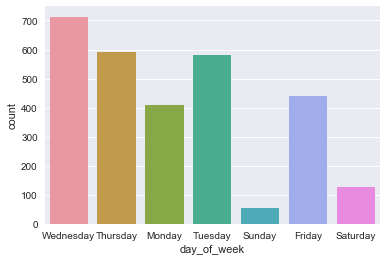

In [3]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

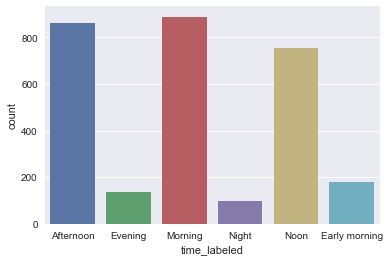

In [4]:
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [6]:
stream_views_df = stream_views_df[(stream_views_df["num_cards"] > 1) & (stream_views_df["num_views"] > 1)]
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


## Cluster  the users and the streams and based on that set the values for user type and stream type - based on the views